In [1]:
%matplotlib notebook

In [2]:
%matplotlib inline

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import healpy as hp
from scipy.stats import binned_statistic
import rubin_sim.maf as maf
from rubin_sim.data import get_baseline
import time
import sys
import sqlite3


# get just the first year of observations

In [4]:
baseline_db = "baseline_v3.0_10yrs.db"
year1_fname = 'first_year_{}.db'.format(baseline_db.split(".db")[0])

In [5]:
if not os.path.isfile(year1_fname): 
    print("get year 1 observations")
    conn = sqlite3.connect(baseline_db)
    df = pd.read_sql('select * from observations;', conn)
    df_year1 = df[df["night"]<366]
    conn.close()

    # open up a connection to a new database
    conn = sqlite3.connect(year1_fname)
    df_year1.to_sql('observations', conn, index=False, if_exists='replace')
    conn.close()
    
else:
    conn = sqlite3.connect(year1_fname)
    df_year1 = pd.read_sql('select * from observations;', conn)
    conn.close()

In [6]:
# set up slicer for metrics
# nside = 256
nside = 32
hp_slice = maf.HealpixSlicer(nside=nside)

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes


# run some metrics on the baseline and reduced datasets

In [7]:
# load the database files
nside_file = 256
# nside_file = 32
template_timescale = 28
fname = "visit_cut_t-{}d_nside-{}.db".format(template_timescale,nside_file)

opsim_list = [year1_fname]
for t in [28,112,168]:
    opsim_list.append("visit_cut_t-{}d_nside-{}.db".format(t,nside_file))

In [8]:
opsim_list

['first_year_baseline_v3.0_10yrs.db',
 'visit_cut_t-28d_nside-256.db',
 'visit_cut_t-112d_nside-256.db',
 'visit_cut_t-168d_nside-256.db']

# plot the cumulative number of visits/pairs as a function of the night

Be careful to use the correct slicer/metric! e.g. a time slicer for looking at nights and a spatial slicer for looking at area.

When template generationis considered, there should be zero visits until the first template generation time

In [9]:
run_dict_visits_night = {}
nights = np.arange(0, 365, 1)
s = maf.OneDSlicer(sliceColName="night", bins = nights)
    
for i in range(len(opsim_list)):
    opsdb = maf.OpsimDatabase(opsim_list[i])
    runName = os.path.split(opsdb)[-1].replace('.db', '')
    print(runName)

    bdict = {}
    for f in 'ugrizy':
        m = maf.metrics.CountMetric(col="night", metricName='Count')
#         constraint = f'filter == "{f}"'
        constraint = f'filter == "{f}" and note not like "%DD%"' # don't choose any of the DD field visits

        bdict[f] = maf.MetricBundle(m, s, constraint, runName=runName)

    g = maf.MetricBundleGroup(bdict, opsdb, 'temp')
    g.runAll()
    
    run_dict_visits_night[runName] = bdict

first_year_baseline_v3.0_10yrs
Querying table None with constraint filter == "i" and note not like "%DD%" for columns ['night']
Found 51215 visits
Running:  ['i']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "r" and note not like "%DD%" for columns ['night']
Found 47662 visits
Running:  ['r']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "g" and note not like "%DD%" for columns ['night']
Found 14795 visits
Running:  ['g']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "z" and note not like "%DD%" for columns ['night']


/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/slicers/oneDSlicer.py:108: UserWarning: Warning: this OneDSlicer was already set up once. Re-setting up a OneDSlicer is unpredictable; at the very least, it will change the mapping of the simulated data into the data slices, and may result in poor binsize choices (although these may potentially be ok). A safer choice is to use a separate OneDSlicer for each MetricBundle.
  warnings.warn(warning_msg)
/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/slicers/oneDSlicer.py:108: UserWarning: Warning: this OneDSlicer was already set up once. Re-setting up a OneDSlicer is unpredictable; at the very least, it will change the mapping of the simulated data into the data slices, and may result in poor binsize choices (although these may potentially be ok). A safer choice is to use a separate OneDSlicer for each MetricBundle.
  warnings.warn(warning_msg)
/Users/jrobinson/miniconda3/envs

Found 38481 visits
Running:  ['z']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "u" and note not like "%DD%" for columns ['night']
Found 9864 visits
Running:  ['u']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "y" and note not like "%DD%" for columns ['night']
Found 47350 visits
Running:  ['y']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
visit_cut_t-28d_nside-256
Querying table None with constraint filter == "i" and note not like "%DD%" for columns ['night']


/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/slicers/oneDSlicer.py:108: UserWarning: Warning: this OneDSlicer was already set up once. Re-setting up a OneDSlicer is unpredictable; at the very least, it will change the mapping of the simulated data into the data slices, and may result in poor binsize choices (although these may potentially be ok). A safer choice is to use a separate OneDSlicer for each MetricBundle.
  warnings.warn(warning_msg)


Found 39554 visits
Running:  ['i']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "r" and note not like "%DD%" for columns ['night']
Found 38193 visits
Running:  ['r']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "g" and note not like "%DD%" for columns ['night']
Found 6996 visits
Running:  ['g']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "z" and note not like "%DD%" for columns ['night']
Found 28582 visits
Running:  ['z']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "u" and note not like "%DD%" for columns ['night']
Found 2941 visits
Running:  ['u']
Completed metric generation.
Running reduce methods.
Running summary st

/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/slicers/oneDSlicer.py:108: UserWarning: Warning: this OneDSlicer was already set up once. Re-setting up a OneDSlicer is unpredictable; at the very least, it will change the mapping of the simulated data into the data slices, and may result in poor binsize choices (although these may potentially be ok). A safer choice is to use a separate OneDSlicer for each MetricBundle.
  warnings.warn(warning_msg)
/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/slicers/oneDSlicer.py:108: UserWarning: Warning: this OneDSlicer was already set up once. Re-setting up a OneDSlicer is unpredictable; at the very least, it will change the mapping of the simulated data into the data slices, and may result in poor binsize choices (although these may potentially be ok). A safer choice is to use a separate OneDSlicer for each MetricBundle.
  warnings.warn(warning_msg)
/Users/jrobinson/miniconda3/envs

Found 33010 visits
Running:  ['y']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
visit_cut_t-112d_nside-256
Querying table None with constraint filter == "i" and note not like "%DD%" for columns ['night']
Found 25117 visits
Running:  ['i']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "r" and note not like "%DD%" for columns ['night']


/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/slicers/oneDSlicer.py:108: UserWarning: Warning: this OneDSlicer was already set up once. Re-setting up a OneDSlicer is unpredictable; at the very least, it will change the mapping of the simulated data into the data slices, and may result in poor binsize choices (although these may potentially be ok). A safer choice is to use a separate OneDSlicer for each MetricBundle.
  warnings.warn(warning_msg)
/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/slicers/oneDSlicer.py:108: UserWarning: Warning: this OneDSlicer was already set up once. Re-setting up a OneDSlicer is unpredictable; at the very least, it will change the mapping of the simulated data into the data slices, and may result in poor binsize choices (although these may potentially be ok). A safer choice is to use a separate OneDSlicer for each MetricBundle.
  warnings.warn(warning_msg)


Found 25678 visits
Running:  ['r']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "g" and note not like "%DD%" for columns ['night']
Found 2553 visits
Running:  ['g']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "z" and note not like "%DD%" for columns ['night']
Found 18754 visits
Running:  ['z']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "u" and note not like "%DD%" for columns ['night']
Found 1198 visits
Running:  ['u']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "y" and note not like "%DD%" for columns ['night']
Found 21941 visits
Running:  ['y']
Completed metric generation.
Running reduce methods.
Running summary st

/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/slicers/oneDSlicer.py:108: UserWarning: Warning: this OneDSlicer was already set up once. Re-setting up a OneDSlicer is unpredictable; at the very least, it will change the mapping of the simulated data into the data slices, and may result in poor binsize choices (although these may potentially be ok). A safer choice is to use a separate OneDSlicer for each MetricBundle.
  warnings.warn(warning_msg)
/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/slicers/oneDSlicer.py:108: UserWarning: Warning: this OneDSlicer was already set up once. Re-setting up a OneDSlicer is unpredictable; at the very least, it will change the mapping of the simulated data into the data slices, and may result in poor binsize choices (although these may potentially be ok). A safer choice is to use a separate OneDSlicer for each MetricBundle.
  warnings.warn(warning_msg)
/Users/jrobinson/miniconda3/envs

Found 19260 visits
Running:  ['i']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "r" and note not like "%DD%" for columns ['night']
Found 19950 visits
Running:  ['r']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "g" and note not like "%DD%" for columns ['night']
Found 2369 visits
Running:  ['g']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "z" and note not like "%DD%" for columns ['night']
Found 13866 visits
Running:  ['z']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "u" and note not like "%DD%" for columns ['night']
Found 1045 visits
Running:  ['u']
Completed metric generation.
Running reduce methods.
Running summary st

/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/slicers/oneDSlicer.py:108: UserWarning: Warning: this OneDSlicer was already set up once. Re-setting up a OneDSlicer is unpredictable; at the very least, it will change the mapping of the simulated data into the data slices, and may result in poor binsize choices (although these may potentially be ok). A safer choice is to use a separate OneDSlicer for each MetricBundle.
  warnings.warn(warning_msg)
/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/slicers/oneDSlicer.py:108: UserWarning: Warning: this OneDSlicer was already set up once. Re-setting up a OneDSlicer is unpredictable; at the very least, it will change the mapping of the simulated data into the data slices, and may result in poor binsize choices (although these may potentially be ok). A safer choice is to use a separate OneDSlicer for each MetricBundle.
  warnings.warn(warning_msg)
/Users/jrobinson/miniconda3/envs

In [10]:
# masked array filled vs compressed?
run_dict_visits_night["visit_cut_t-28d_nside-256"]["z"].metricValues.compressed()
# run_dict_visits_night["visit_cut_t-28d_nside-256"]["z"].metricValues.filled()

array([141., 131., 161.,  61.,  57., 161.,  96., 153., 156., 189., 122.,
       106.,  58., 152., 128., 165., 174.,  86.,  65., 180.,  52.,  70.,
       152., 148., 170.,  94., 178., 130., 272.,  98., 118., 161.,  43.,
       220., 138., 110., 258.,  73.,  98., 212., 168.,  25., 164., 113.,
       164., 153., 106., 201., 238., 135., 184., 135., 156., 200.,  98.,
       173., 165., 285., 209., 280., 196.,  72., 257., 253., 307., 227.,
       150., 168., 266.,  37., 159.,  89., 216., 128., 159.,  61., 158.,
       186., 162., 173., 188., 246., 319., 204., 252., 135., 115.,  91.,
       264., 352., 363., 198., 157., 228., 356., 209., 238., 271., 396.,
       144., 285., 277., 276., 305., 186.,  88., 345.,  79., 282., 279.,
       212., 239., 450., 136., 118., 294., 105., 344., 206., 211., 287.,
       245., 202., 113., 418., 414.,  50.,  48.,  96., 108., 206., 149.,
        49.,  21.,  50., 259., 104., 264., 220., 130., 283., 127., 255.,
        98., 172., 261., 253., 324., 304., 352., 16

In [11]:
# x = run_dict_visits_night["visit_cut_t-28d_nside-32"]["z"].metricValues
x = run_dict_visits_night["visit_cut_t-28d_nside-256"]["z"].metricValues
x_data = x.data
x_mask = x.mask
len(x_data[x_mask])

207

In [12]:
len(x_data[~x_mask])

157

In [13]:
# y = run_dict_visits_night["visit_cut_t-28d_nside-32"]["z"].slicer.slicePoints["sid"]
y = run_dict_visits_night["visit_cut_t-28d_nside-256"]["z"].slicer.slicePoints["sid"]

In [14]:
len(x),len(y)

(364, 364)

first_year_baseline_v3.0_10yrs u
visit_cut_t-28d_nside-256 u
visit_cut_t-112d_nside-256 u
visit_cut_t-168d_nside-256 u


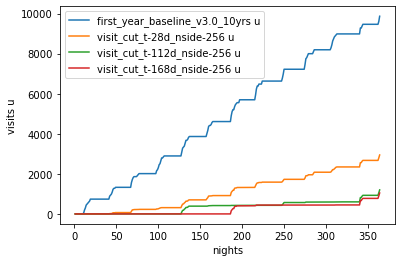

first_year_baseline_v3.0_10yrs g
visit_cut_t-28d_nside-256 g
visit_cut_t-112d_nside-256 g
visit_cut_t-168d_nside-256 g


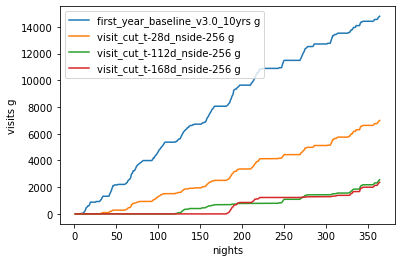

first_year_baseline_v3.0_10yrs r
visit_cut_t-28d_nside-256 r
visit_cut_t-112d_nside-256 r
visit_cut_t-168d_nside-256 r


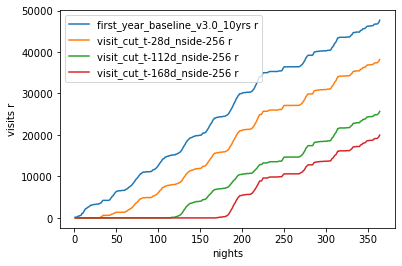

first_year_baseline_v3.0_10yrs i
visit_cut_t-28d_nside-256 i
visit_cut_t-112d_nside-256 i
visit_cut_t-168d_nside-256 i


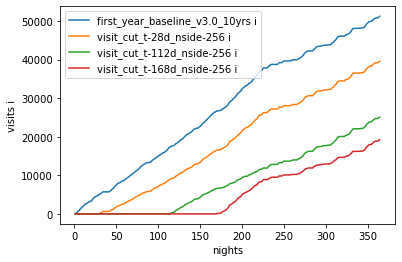

first_year_baseline_v3.0_10yrs z
visit_cut_t-28d_nside-256 z
visit_cut_t-112d_nside-256 z
visit_cut_t-168d_nside-256 z


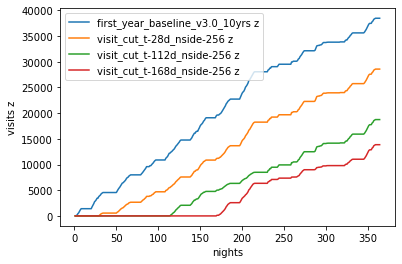

first_year_baseline_v3.0_10yrs y
visit_cut_t-28d_nside-256 y
visit_cut_t-112d_nside-256 y
visit_cut_t-168d_nside-256 y


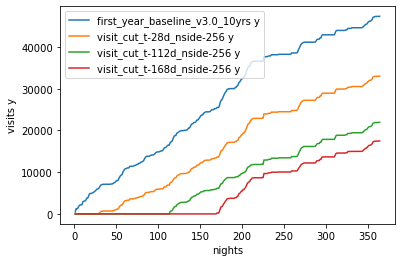

In [15]:
for f in 'ugrizy':

    fig = plt.figure()
    gs = gridspec.GridSpec(1,1)
    ax1 = plt.subplot(gs[0,0])
    
    for r in run_dict_visits_night.keys():
        
        print(r,f)
        
        y = run_dict_visits_night[r][f].metricValues.filled()
        x = run_dict_visits_night[r][f].slicer.slicePoints["bins"][1:]
#         ax1.plot(x, y, label="{} {}".format(r,f))
        ax1.plot(x, y.cumsum(), label="{} {}".format(r,f))
    
    ax1.legend()
    ax1.set_xlabel("nights")
    ax1.set_ylabel('visits {}'.format(f))

#     ax1.set_xlim(0,50)
#     ax1.set_ylim(0,50000)

    plt.show()

# Compare Nvisit

Can we mask the deep drilling fields and focus on WFD?

In [16]:
run_dict_visits = {}

for i in range(len(opsim_list)):
    opsdb = maf.OpsimDatabase(opsim_list[i])
    runName = os.path.split(opsdb)[-1].replace('.db', '')
    print(runName)

    bdict = {}
    for f in 'ugrizy':
        m = maf.metrics.CountMetric(col='observationStartMJD', metricName='Nvisits')
#         constraint = f'filter == "{f}"'
        constraint = f'filter == "{f}" and note not like "%DD%"' # don't choose any of the DD field visits

        bdict[f] = maf.MetricBundle(m, hp_slice, constraint, runName=runName)

    g = maf.MetricBundleGroup(bdict, opsdb, 'temp')
    g.runAll()
    
    run_dict_visits[runName] = bdict

first_year_baseline_v3.0_10yrs
Querying table None with constraint filter == "i" and note not like "%DD%" for columns ['rotSkyPos', 'fieldRA', 'fieldDec', 'observationStartMJD']
Found 51215 visits
Running:  ['i']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "r" and note not like "%DD%" for columns ['rotSkyPos', 'fieldRA', 'fieldDec', 'observationStartMJD']
Found 47662 visits
Running:  ['r']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "g" and note not like "%DD%" for columns ['rotSkyPos', 'fieldRA', 'fieldDec', 'observationStartMJD']
Found 14795 visits
Running:  ['g']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "z" and note not like "%DD%" for columns ['rotSkyPos', 'fieldRA', 'fieldDec', 'observationStartMJD']


In [17]:
run_dict_visits.keys()

dict_keys(['first_year_baseline_v3.0_10yrs', 'visit_cut_t-28d_nside-256', 'visit_cut_t-112d_nside-256', 'visit_cut_t-168d_nside-256'])

In [18]:
bdict.keys()

dict_keys(['u', 'g', 'r', 'i', 'z', 'y'])

In [19]:
run_dict_visits[runName]["r"].slicer

In [20]:
bdict["r"].slicer

0.0 180.0 -180.0 180.0


0.0 180.0 -180.0 180.0


0.0 180.0 -180.0 180.0


0.0 180.0 -180.0 180.0


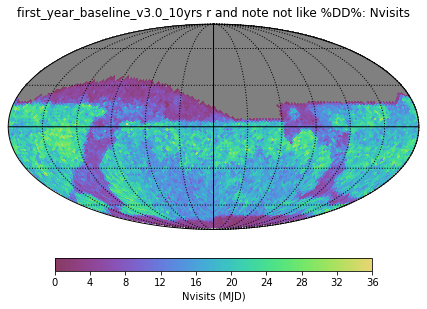

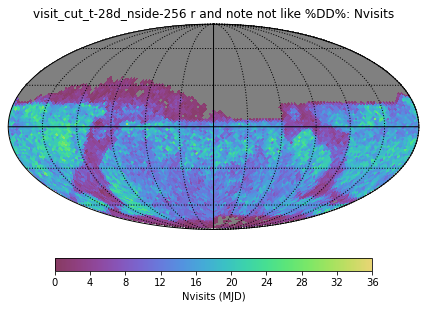

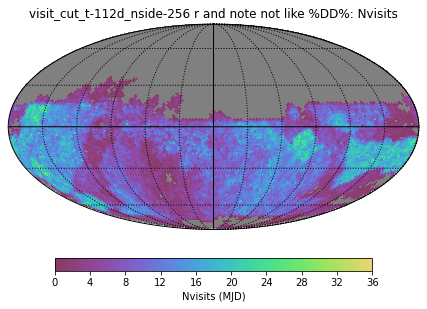

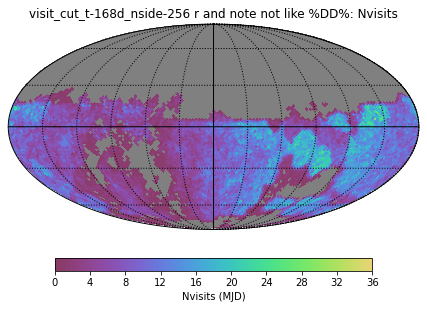

In [25]:
ph = maf.PlotHandler(outDir='temp', thumbnail=False)

# plotDict = {'colorMin': 0, 'colorMax': 35}
plotDict = {'colorMin': 0, 'colorMax': 36}
# plotDict = {}

for r in run_dict_visits.keys():
    bdict = run_dict_visits[r]
    
    # for f in 'ugrizy':
    for f in 'r':
        print(bdict[f].slicer)
        ph.setMetricBundles([bdict[f]])
        ph.plot(plotFunc=maf.HealpixSkyMap(), plotDicts=plotDict)

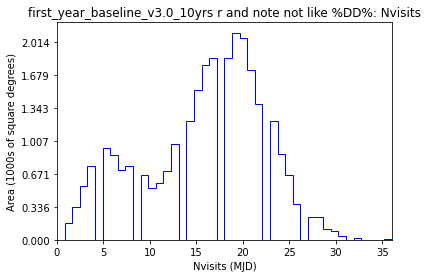

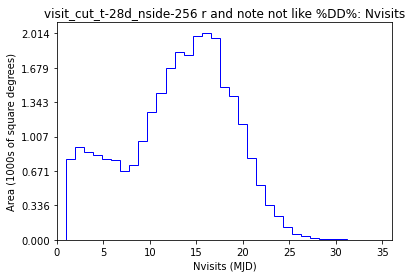

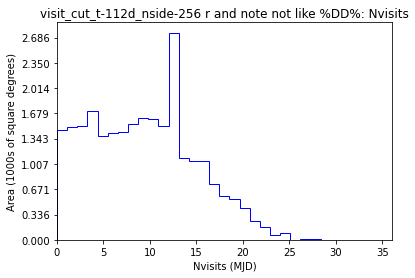

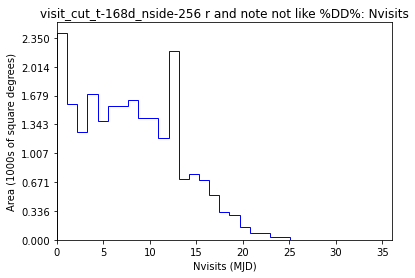

In [27]:
ph = maf.PlotHandler(outDir='temp', thumbnail=False)

# plotDict = {'xMin':0, 'xMax':40}
plotDict = {'xMin':0, 'xMax':36}
# plotDict = {}

for r in run_dict_visits.keys():
    bdict = run_dict_visits[r]
    
    # for f in 'ugrizy':
    for f in 'r':
        ph.setMetricBundles([bdict[f]])
        ph.plot(plotFunc=maf.HealpixHistogram(), plotDicts=plotDict)

first_year_baseline_v3.0_10yrs r 27888.04924307665
visit_cut_t-28d_nside-256 r 27475.116769632757
visit_cut_t-112d_nside-256 r 25497.740941515247
visit_cut_t-168d_nside-256 r 22993.288704205126


/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/var/folders/6r/3460lbq91j9402dmmk71v61m0000gt/T/ipykernel_94425/2929735343.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['{:3.0f}'.format(x * pix_area) for x in y_vals])


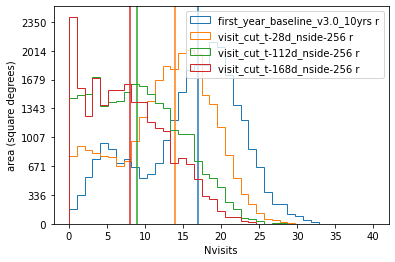

In [28]:
# manually plot the histograms

fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])
# bins = "auto"
# bins = 200
bins = np.linspace(0,40,40)
pix_area = hp.pixelfunc.nside2pixarea(nside, degrees=True) # square degrees

for i,r in enumerate(run_dict_visits.keys()):
    bdict = run_dict_visits[r]
    
    # for f in 'ugrizy':
    for f in 'r':
        bundle = bdict[f]
        
        data = bundle.metricValues
        data = data[~data.mask]
        n,b,p = ax1.hist(data, bins = bins, histtype = "step", label = "{} {}".format(r, f))
        
        ax1.axvline(np.median(data),c="C{}".format(i))
        
        # total area
        print(r,f,sum(n)*pix_area)
        

# scale the y axis to get sky area
y_vals = ax1.get_yticks()
ax1.set_yticklabels(['{:3.0f}'.format(x * pix_area) for x in y_vals])

ax1.set_xlabel("Nvisits")
ax1.set_ylabel("area (square degrees)")

# ax1.set_yscale("log")
# ax1.set_xlim(0,50)

ax1.legend()

plt.show()

# look at the area of sky with pairs of visits
Consider all filters for pairs useful for moving object dicovery. Will pairs in the same filter be more relevant for other science cases e.g. supernovae?

In [29]:
run_dict_pairs = {}

for i in range(len(opsim_list)):
    opsdb = maf.OpsimDatabase(opsim_list[i])
    runName = os.path.split(opsdb)[-1].replace('.db', '')
    print(runName)

    bdict = {}
#     for f in 'ugrizy':
    for f in ["all"]:
        m = maf.metrics.pairMetric.PairMetric(mjdCol='observationStartMJD', metricName='Pairs')
        
        if f=="all":
#             constraint = None
            constraint = 'note not like "%DD%"' # don't choose any of the DD field visits

        else:
#             constraint = "filter=={}".format(f) # change this to accept lists?
            constraint = f'filter == "{f}" and note not like "%DD%"' # don't choose any of the DD field visits

        bdict[f] = maf.MetricBundle(m, hp_slice, constraint, runName=runName)

    g = maf.MetricBundleGroup(bdict, opsdb, 'temp')
    g.runAll()
    
    run_dict_pairs[runName] = bdict

first_year_baseline_v3.0_10yrs
Querying table None with constraint note not like "%DD%" for columns ['rotSkyPos', 'fieldRA', 'fieldDec', 'observationStartMJD']
Found 209367 visits
Running:  ['all']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
visit_cut_t-28d_nside-256
Querying table None with constraint note not like "%DD%" for columns ['rotSkyPos', 'fieldRA', 'fieldDec', 'observationStartMJD']
Found 149276 visits
Running:  ['all']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
visit_cut_t-112d_nside-256
Querying table None with constraint note not like "%DD%" for columns ['rotSkyPos', 'fieldRA', 'fieldDec', 'observationStartMJD']
Found 95241 visits
Running:  ['all']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
visit_cut_t-168d_nside-256
Querying table None with constraint note not like "%DD%" for columns ['rotSkyPos', 'fieldRA', 'fieldDec', 'observ

In [30]:
bdict

{'all': <rubin_sim.maf.metricBundles.metricBundle.MetricBundle at 0x16eb2d1f0>}

0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0


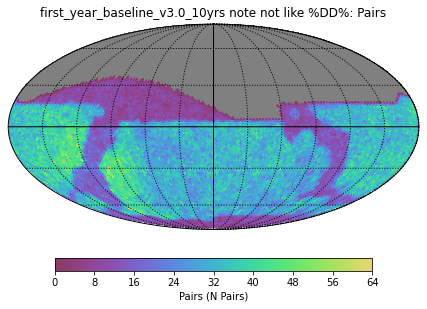

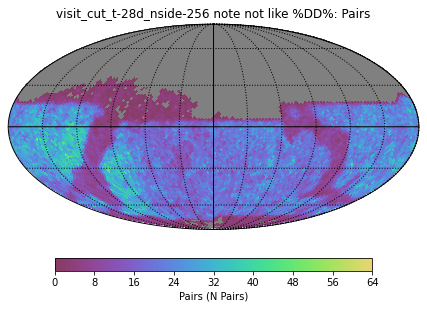

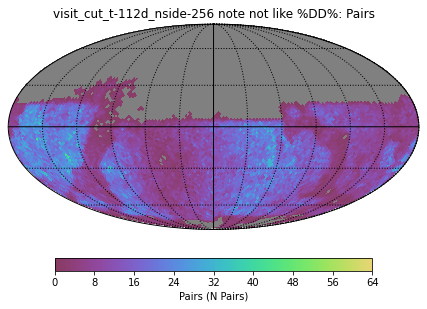

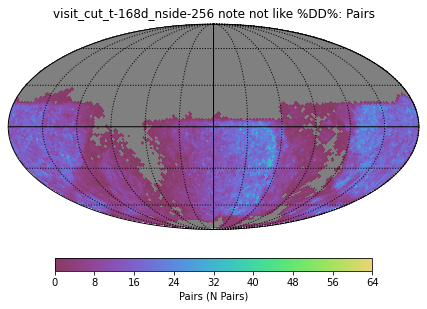

In [36]:
ph = maf.PlotHandler(outDir='temp', thumbnail=False)

# plotDict = {'colorMin': 0, 'colorMax': 60}
plotDict = {'colorMin': 0, 'colorMax': 64}
# plotDict = {}

for r in run_dict_pairs.keys():
    bdict = run_dict_pairs[r]
    
    ph.setMetricBundles([bdict["all"]])
    ph.plot(plotFunc=maf.HealpixSkyMap(), plotDicts=plotDict)

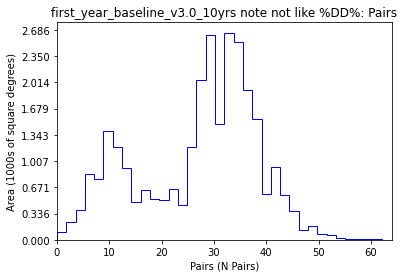

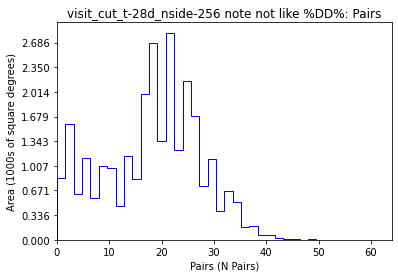

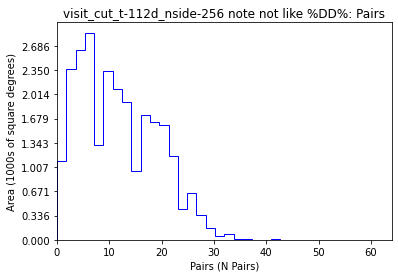

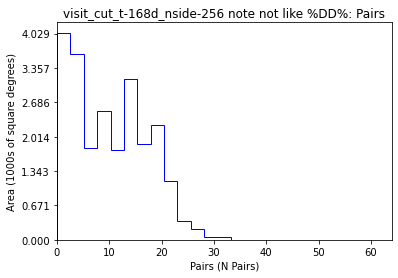

In [37]:
ph = maf.PlotHandler(outDir='temp', thumbnail=False)

plotDict = {'xMin':0, 'xMax':64}

for r in run_dict_pairs.keys():
    bdict = run_dict_pairs[r]
 
    ph.setMetricBundles([bdict["all"]])    
    ph.plot(plotFunc=maf.HealpixHistogram(), plotDicts=plotDict)

In [33]:
# look at the area covered by templates, similar to lynne notebook
# use healpix slicer on database redacted template database
# find the night of the first image available for each healpix

In [34]:
# Check discovery of solar system objects: DiscoveryMetric
# but this only works for a given orbit?

In [ ]:
# Solar system alerts require 3 pairs of observations a few nights apart